In [1]:
import sys
sys.path.insert(0,"..")
import speasy as spz
from datetime import datetime
import matplotlib.pyplot as plt

Plot Solar Orbiter observation data between 2020/07/23 16:00:00 and 2020/07/24 06:00:00.

In [2]:
start = "2020/07/24T02:00:00"
stop = "2020/07/24T04:00:00"

In [3]:
solo_b_id = "solo_b_rtn_hr"
solo_n_id = "pas_momgr_n"
solo_v_id = "pas_mom_v"

parameter_ids = [solo_b_id, solo_n_id, solo_v_id]
parameter_data = [spz.get_data(f"amda/{pid}", start, stop) for pid in parameter_ids]

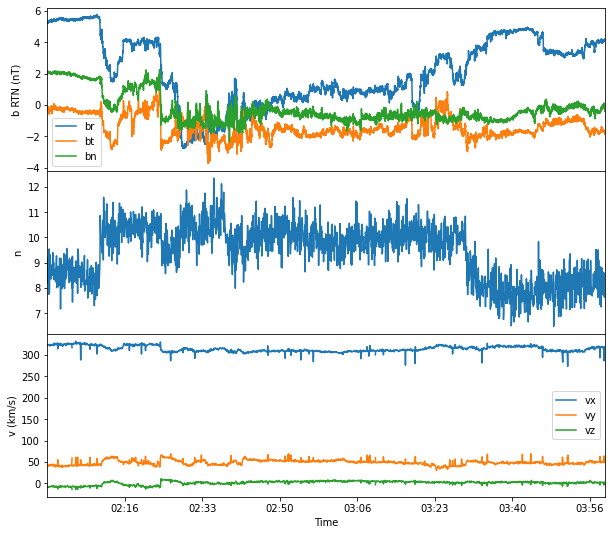

In [4]:
from speasy_utils.plot import parameter_plot

ax = parameter_plot([f"amda/{pid}" for pid in parameter_ids], 
                    start, stop,
                   ylabel=["b RTN (nT)", "n", "v (km/s)"],
                   xlabel="Time",
                   labels=[["br","bt","bn"], None,["vx","vy","vz"]])
plt.show()

In [27]:
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd

def delta_mean(x, step=1, mean_window=20*60):
    fx = interp1d(x.time, x.data, axis=0)
    # interpolation time
    nt = np.arange(b_data.time[0], b_data.time[-1], step)
    # interpolated data
    nx = fx(nt)
    # create datafream
    df = pd.DataFrame(data = nx, index=nt)
    # rolling mean
    rw = int(mean_window/step)
    bbar = b_ts.rolling(rw).mean()
    # interpolate rolling mean value
    fxbar = interp1d(bbar.index-(mean_window/2), bbar.values, axis=0, bounds_error=False)
    # mean value interpolated
    nxbar = fxbar(nt)
    
    return nt, nxbar, nx

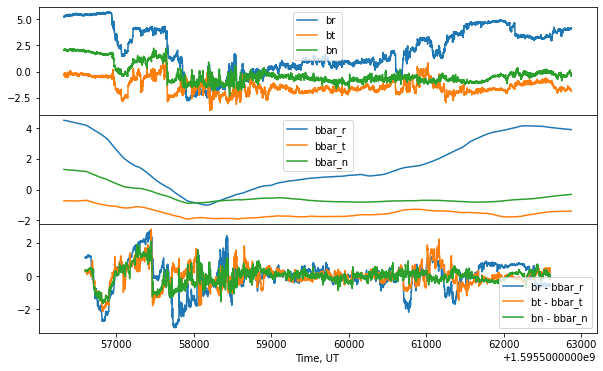

In [61]:
fig, ax = plt.subplots(3,1, figsize=(10, 6))
b_param = parameter_data[0]

tt, xx, yy = delta_mean(b_param)
lines=ax[0].plot(parameter_data[0].time, parameter_data[0].data)
ax[0].legend(lines, ["br","bt","bn"])
ax[0].set_xticks([])
lines=ax[1].plot(tt,xx)
ax[1].legend(lines, ["bbar_r","bbar_t","bbar_n"])

lines=ax[2].plot(tt,yy - xx)
ax[2].legend(lines, ["br - bbar_r","bt - bbar_t","bn - bbar_n"])


from speasy_utils.plot import set_date_xticks
set_date_xticks(ax[1])
ax[-1].set_xlabel("Time, UT")
ax[-1].set_xlim(b_param.time.min(), b_param.time.max())
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

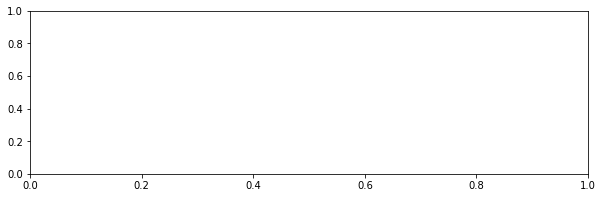

In [109]:
fig, ax = plt.subplots(1,1,  figsize=(10, 3))

# one arrow per 10 minute
indx = np.arange(0, xx.shape[0], 600)
for i in indx:
    v = yy[i] - xx[i]
    #ax.arrow(tt[i], 0, v[0], v[1],length_includes_head=True,
    #        width = .001, head_width=.0003, head_length=.00015)
    ax.annotate("",
            xy=(1,tt[i]/10000000), xycoords='data',
            xytext=(tt[i]/1000000,0), textcoords='data',
            arrowprops=dict(arrowstyle="-|>"))

#set_date_xticks(ax)
plt.show()

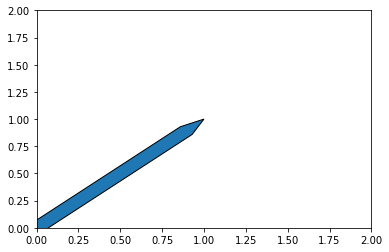

In [46]:
plt.figure()
plt.arrow(0,0, 1,1, head_width=.1, length_includes_head=True, width=.1)
plt.xlim([0,2])
plt.ylim([0,2])
plt.show()

NameError: name 't' is not defined

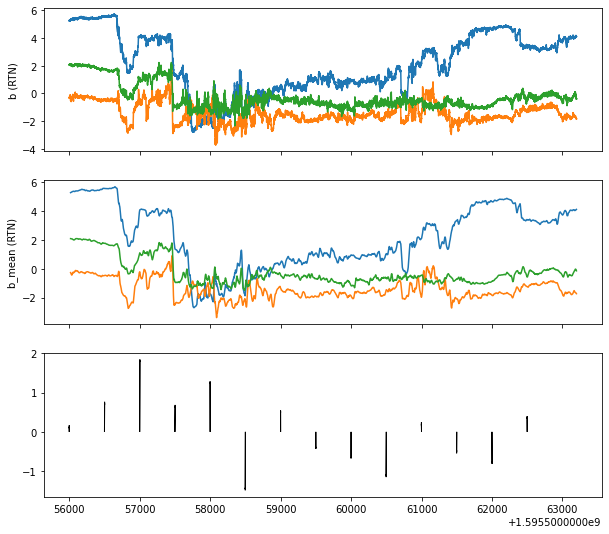

In [8]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(10, 9))


    
    

b_data = parameter_data[0]

b_func = interp1d(b_data.time, b_data.data, axis=0)
#t = [datetime.utcfromtimestamp(ti) for ti in b_data.time]
nt = np.arange(b_data.time[0], b_data.time[-1], 1)

b = b_func(nt)

b_ts = pd.DataFrame(data = b, index=nt)

b_mean = b_ts.rolling(20).mean()
b_mean_func = interp1d(b_mean.index-600, b_mean.values, axis=0, bounds_error=False)
bm = b_mean_func(nt)


ax[0].plot(b_data.time, b_data.data)
ax[0].set_ylabel("b (RTN)")

tt = [datetime.utcfromtimestamp(ti-600) for ti in b_mean.index]
ax[1].plot(b_mean.index, b_mean.values)
ax[1].set_ylabel("b_mean (RTN)")

# one arrow per 10 minute
x_bases = np.arange(b_data.time[0], b_data.time[-1], 500)
for x_b in x_bases:
    bt = b_func(x_b)
    bmt = b_mean_func(x_b)
    db = bt - bmt
    
    ax[2].arrow(x_b, 0, db[0], db[1], 
                #head_width=None,
               #head_length=None,
               #width= 0.001,
                head_width=0.08, head_length=0.00002,
               length_includes_head=True)

ttt = [datetime.utcfromtimestamp(ti) for ti in nt]
#ax[2].plot(ttt, b-bm)
#ax[3].xaxis.set_major_formatter(datefmt)
#ax[3].set_xlabel("Time")
ax[-1].set_xlim(t[0], t[-1])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
plt.plot(b_mean.values)